### Importing packages

In [127]:
import numpy
from timeit import default_timer as timer
import matplotlib.pyplot as plt
from decimal import Decimal
import math

### Defining functions for the proposed algrithms

#### Sum of vector

In [2]:
def Sum(list):
    sum=0 # defining sum=0 for cumulative sum
    for j in range(len(list)): #calculating the sum of vector elements
            sum+=list[j]
    return sum

#### Product of vector

In [3]:
def Product(list):
    product=1 # defining sum=0 for cumulative multiplication
    for j in range(len(list)): #calculating the product of vector elements
            product*=list[j]
    return product

#### Polynomial Direct Calculation

In [37]:
def PolyDirect(poly, n, x):
    # Initializing result value
    value = 0   # defining value=0 for cumulative sum
    for i in range(n):
        # using the Decimal to avoid the overfmin of the memory because  the decimal library allows arbitrary precision and can handle large sizes
        value = Decimal(value) + Decimal(Decimal (poly[i])* pow(Decimal(x),Decimal(i)))
    return Decimal(value) 

#### Horner method to evaluate polynomial

In [41]:
def Horner(poly, n, x):
    # Initializing value
    value = poly[0] 
    for i in range(1, n):
        # using the Decimal to avoid the overflow of the memory because  the decimal library allows arbitrary precision and can handle large sizes
        value = Decimal(value)*Decimal(x) + Decimal(poly[i])
    return Decimal(value)

#### Bubble Sort

In [6]:
def bubble_sort(list):
    n = len(list) 
    # loop through all list elements
    for i in range(n):
        # Last i elements are already in place
        for j in range(0, n-i-1):
            # loop through the list from 0 to n-i-1
            # Swap if the element found is greater than the next element
            if list[j] > list[j+1] :
                list[j], list[j+1] = list[j+1], list[j]

#### Quick sort

In [7]:
# defining a partition function
def partition(list, min, max):
    i = (min-1)         # index of smaller element
    pivot = list[max]  # pivot
    for j in range(min, max):
        # Checking if current element is smaller than or equal to pivot
        if list[j] <= pivot:
            # then increment index of smaller element
            i = i+1
            list[i], list[j] = list[j], list[i]
    list[i+1], list[max] = list[max], list[i+1]
    return (i+1)
# defining quick sort function
def quickSort(list, min, max):
    if len(list) == 1:
        return list
    if min < max:
        # pi is partitioning index, list[p] is now at right place
        pi = partition(list, min, max)
        # Separately sort elements left and right to the patition element
        quickSort(list, min, pi-1)
        quickSort(list, pi+1, max)

#### Timsort

In [8]:
# Following function is not implemented by me, instead it is from https://www.geeksforgeeks.org/timsort/
# MIN_MERGE = 32
# Define a function to returns the minimum length of a run from 23 - 64 so that the len(array)/minrun is less than or equal to a power of 2
def calcMinRun(n):
    r = 0
    while n >= MIN_MERGE:
        r |= n & 1
        n >>= 1
    return n + r

# Define a function to sort an array from left to right index which is of size atmost RUN
def insertionSort(arr, left, right):
    for i in range(left + 1, right + 1):
        j = i
        while j > left and arr[j] < arr[j - 1]:
            arr[j], arr[j - 1] = arr[j - 1], arr[j]
            j -= 1
 
# Merge function merges the sorted runs
def merge(arr, l, m, r):
    # original array is broken in two parts left and right array
    len1, len2 = m - l + 1, r - m
    left, right = [], []
    for i in range(0, len1):
        left.append(arr[l + i])
    for i in range(0, len2):
        right.append(arr[m + 1 + i])
    i, j, k = 0, 0, l
    # after comparing, we merge those two array in larger sub array
    while i < len1 and j < len2:
        if left[i] <= right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    # Copy remaining elements of left, if any
    while i < len1:
        arr[k] = left[i]
        k += 1
        i += 1
    # Copy remaining element of right, if any
    while j < len2:
        arr[k] = right[j]
        k += 1
        j += 1
# Iterative Timsort function to sort the array[0...n-1] (similar to merge sort)
def timSort(arr):
    n = len(arr)
    minRun = calcMinRun(n)
    # Sort individual subarrays of size RUN
    for start in range(0, n, minRun):
        end = min(start + minRun - 1, n - 1)
        insertionSort(arr, start, end)
    # Start merging from size RUN (or 32). It will merge
    # to form size 64, then 128, 256 and so on ....
    size = minRun
    while size < n:
        # Pick starting point of left sub array. We are going to merge arr[left..left+size-1] and arr[left+size, left+2*size-1]
        # After every merge, we increase left by 2*size
        for left in range(0, n, 2 * size):
            # Find ending point of left sub array
            # mid+1 is starting point of right sub array
            mid = min(n - 1, left + size - 1)
            right = min((left + 2 * size - 1), (n - 1))
            # Merge sub array arr[left.....mid] & arr[mid+1....right]
            if mid < right:
                merge(arr, left, mid, right)
        size = 2 * size

### Measuring the average computer execution time

#### Defining some consts.

In [26]:
N=2001  #2001 #Number of maximum input size
num_processes=9 #number of algorithms to be tested
num_iteration=5 # number of round for each algorithms
const=5         # the const for the const function in the first algorithms
# Declaring zeros list for saving the avg time for each algo for each n.
avg_time=numpy.zeros((num_processes, N-1))
# Declaring the name of the algorithms in an array
processes_names=['Const Function','Sum of Vector','Product of Vector', 'Direct Calculation of Polynomial', 'Horner Method Calculation of Polynomial','Bubble Sort','Quick Sort ','TimSort','multiplying matrixes']

#### Measuring the average computer execution time for the algorithms applied on one vector

In [63]:
avg_time[0]=0 #making the array where to save the time = 0 
# First Algo, const function
for n in range(1, N):
    #creating random vector of size n
    v=numpy.random.random_sample((n,))
    # looping over index to repeat each process 5 times. Then to calculate the avg time consumed.
    for index in range (num_iteration):
        # 1.𝑓(𝒗) = 𝑐𝑜𝑛𝑠𝑡 (constant function)
        first_start = timer()
        result=const;   #const function
        first_end = timer()
        # Saving the time in the suitable array element. After the looping over index, the avg of time will be calculated by dividing by 5.
        avg_time[0][n-1]+=(first_end - first_start)
#Dividing the array by 5 to get the average of all times.
avg_time[0]=avg_time[0]/5

In [47]:
avg_time[1]=0 #making the array where to save the time = 0 
# Second Algo, sum of vector
for n in range(1, N):
    #creating random vector of size n
    v=numpy.random.random_sample((n,))
    # looping over index to repeat each process 5 times. Then to calculate the avg time consumed.
    for index in range (num_iteration):
        # 2.𝑓(𝒗) = (the sum of elements)
        second_start = timer()
        sum= Sum(v)
        second_end = timer()
        avg_time[1][n-1]+=(second_end - second_start)
#Dividing the array by 5 to get the average of all times.
avg_time[1]=avg_time[1]/5

In [46]:
avg_time[2]=0 #making the array where to save the time = 0 
# Third Algo, product of vector
for n in range(1, N):
    #creating random vector of size n
    v=numpy.random.random_sample((n,))
    # looping over index to repeat each process 5 times. Then to calculate the avg time consumed.
    for index in range (num_iteration):
        # 3.𝑓(𝒗) = (the product of elements)
        third_start = timer()
        product= Product(v)
        third_end = timer()
        avg_time[2][n-1]+=(third_end - third_start)
#Dividing the array by 5 to get the average of all times.
avg_time[2]=avg_time[2]/5

In [45]:
avg_time[3]=0 #making the array where to save the time = 0 
# Forth Algo- First, evaluation of polynomial
for n in range(1, N):
    #creating random vector of size n
    v=numpy.random.random_sample((n,))
    # looping over index to repeat each process 5 times. Then to calculate the avg time consumed.
    for index in range (num_iteration):
        # 4.1 𝑃(1.5) by a direct calculation 
        forth_start = timer()
        result=PolyDirect(v,n,1.5)
        forth_end = timer()
        avg_time[3][n-1]+=(forth_end - forth_start)
#Dividing the array by 5 to get the average of all times.
avg_time[3]=avg_time[3]/5

In [44]:
avg_time[4]=0 #making the array where to save the time = 0 
# Forth Algo-Second, Horner evaluation of polynomial
for n in range(1, N):
    #creating random vector of size n
    v=numpy.random.random_sample((n,))
    # looping over index to repeat each process 5 times. Then to calculate the avg time consumed.
    for index in range (num_iteration):
        # 4.2 𝑃(1.5) by Horner’s method
        fifth_start = timer()
        result=Horner(v,n,1.5)
        fifth_end = timer()
        avg_time[4][n-1]+=(fifth_end - fifth_start)
#Dividing the array by 5 to get the average of all times.
avg_time[4]=avg_time[4]/5

In [43]:
avg_time[5]=0 #making the array where to save the time = 0 
#  Fifth Algo, Bubble Sort
for n in range(1, N):
    #creating random vector of size n
    v=numpy.random.random_sample((n,))
    # looping over index to repeat each process 5 times. Then to calculate the avg time consumed.
    for index in range (num_iteration):
        # 5. Bubble Sort
        #coping the list to not sort the original list in order to sort the original vector in each round
        to_be_sorted=v
        sixth_start = timer()
        bubble_sorted = bubble_sort(to_be_sorted)
        sixth_end = timer()
        avg_time[5][n-1]+=(sixth_end-sixth_start)
#Dividing the array by 5 to get the average of all times.
avg_time[5]=avg_time[5]/5

In [217]:
avg_time[6]=0 #making the array where to save the time = 0 
#  Sixth Algo, Quick Sort
for n in range(1, N):
    #creating random vector of size n
    v=numpy.random.random_sample((n,))
    # looping over index to repeat each process 5 times. Then to calculate the avg time consumed.
    for index in range (num_iteration):
        #coping the list to not sort the original list
        to_be_sorted=v
        # 6. Quick Sort 
        seventh_start = timer()
        quick_sorted = quickSort(to_be_sorted, 0, n-1)
        seventh_end = timer()
        avg_time[6][n-1]+=(seventh_end - seventh_start)
#Dividing the array by 5 to get the average of all times.
avg_time[6]=avg_time[6]/5

In [164]:
avg_time[7]=0 #making the array where to save the time = 0 
#  Seventh Algo, Tim Sort
for n in range(1, N):
    #creating random vector of size n
    v=numpy.random.random_sample((n,))
    # looping over index to repeat each process 5 times. Then to calculate the avg time consumed.
    for index in range (num_iteration):
        #coping the list to not sort the original list
        to_be_sorted=v
        # 6. Tim Sort 
        eighth_start = timer()
        time_sorted = timSort(to_be_sorted)
        eighth_end = timer()
        avg_time[7][n-1]+=(eighth_end - eighth_start)
#Dividing the array by 5 to get the average of all times.
avg_time[7]=avg_time[7]/5

#### Measuring the average computer execution time for the two matrix multiplication

In [271]:
avg_time[8]=0 #making the array where to save the time = 0 
# looping from n=1 to n=2001
for n in range(1, N):
    #creating two matrixes of size n*n
    A=numpy.random.random_sample((n,n))
    B=numpy.random.random_sample((n,n))
    # looping over index to repeat each process 5 times. Then to calculate the avg time consumed.
    for index in range (num_iteration):
        # 8. multiplying matrixes
        ninth_start = timer() 
        result=numpy.matmul(A,B)
        ninth_end = timer()
        avg_time[8][n-1]+=(ninth_end - ninth_start)
#Dividing the array by 5 to get the average of all times.
avg_time[8]=avg_time[8]/5

### Plotting average execution time as a function of n

#### Plotting average empirical execution time as a function of n

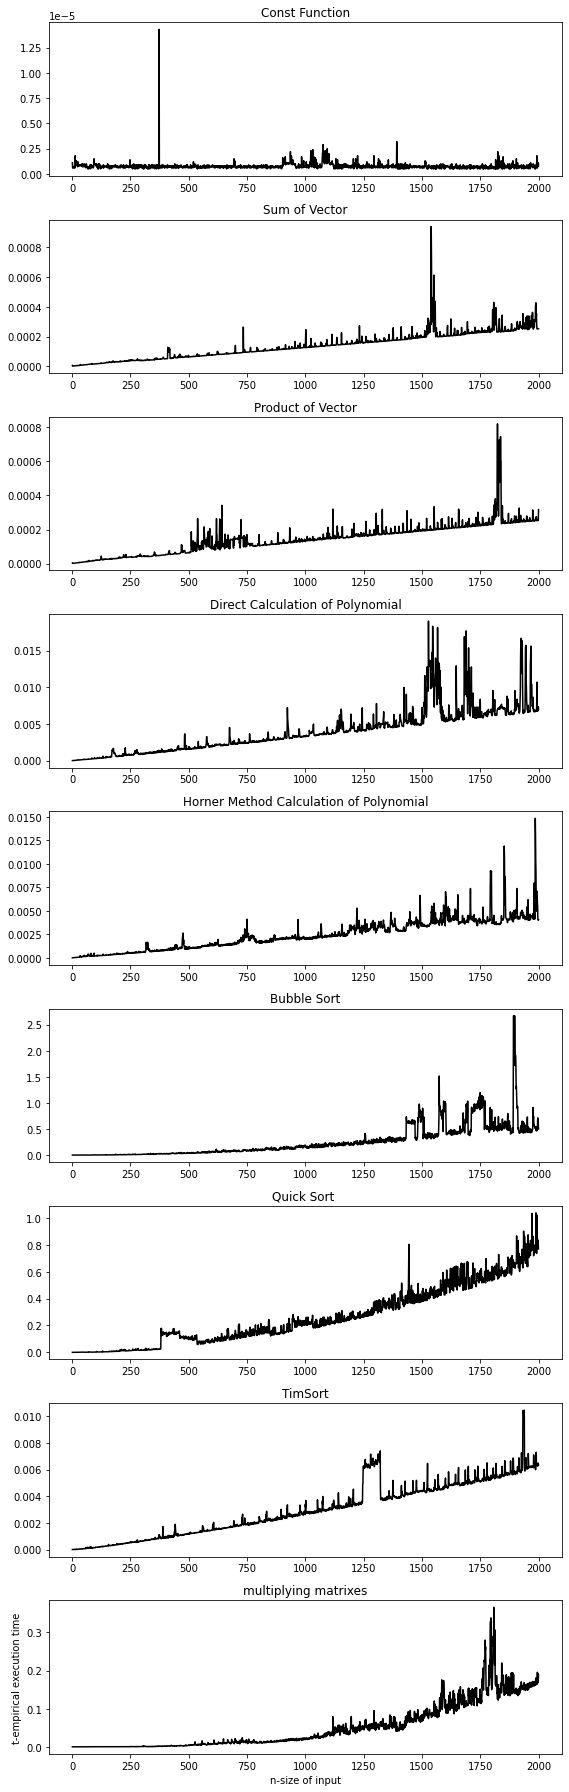

In [303]:
num_rows, num_cols = avg_time.shape
N=2001
x1 = numpy.linspace(1, N-1, N-1, endpoint=True) 
fig, axes = plt.subplots(num_rows,1, figsize=(8,25))
xgrid = x1 = numpy.linspace(1, N-1, N-1, endpoint=True) 
for axis,i in zip(axes,range(0,num_processes)):
    axis.plot(xgrid, avg_time[i], 'k-')
    axis.set_title(processes_names[i])
plt.xlabel("n-size of input")
plt.ylabel("t-empirical execution time")
plt.tight_layout()

#### Comparing average empirical execution time with theoritical execution time

Text(0, 0.5, 't-time')

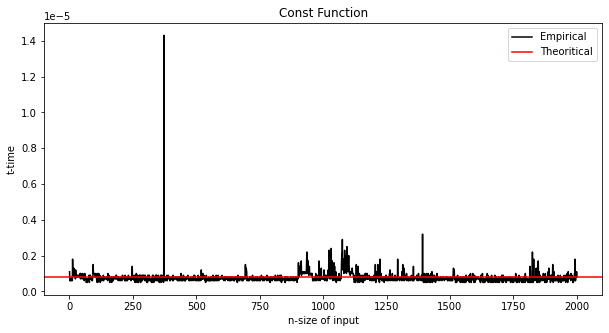

In [260]:
# 1 : const
x1 = numpy.linspace(1, N-1, N-1, endpoint=True) # the axis for the size of the input
y1 = avg_time[0]                                # the average empirical time execution
plt.figure(figsize=(10,5))
plt.plot(x1, avg_time[0], 'k-')
plt.axhline(y = 0.0000008, color = 'r', linestyle = '-')  #the theoritical time execution
plt.title(processes_names[0])
plt.legend(["Empirical", "Theoritical"])
plt.xlabel("n-size of input")
plt.ylabel("t-time")

Text(0, 0.5, 't-time')

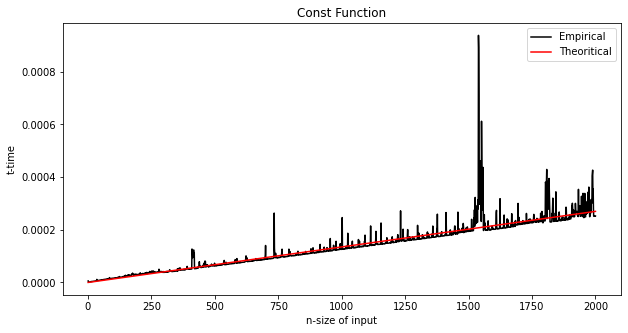

In [258]:
# 2 : linear : sum of vector
N=2001
x1 = numpy.linspace(1, N-1, N-1, endpoint=True) 
y1 = avg_time[1]                            # the average empirical time execution
plt.figure(figsize=(10,5))
plt.plot(x1, y1, 'k-')
plt.plot(x1, 0.000000135*x1, 'r-')          #the theoritical time execution
plt.title(processes_names[0])
plt.legend(["Empirical", "Theoritical"])
plt.xlabel("n-size of input")
plt.ylabel("t-time")

Text(0, 0.5, 't-time')

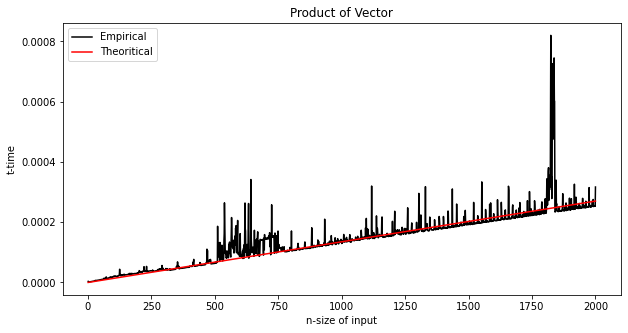

In [257]:
# 3 : product of vector
N=2001
x1 = numpy.linspace(1, N-1, N-1, endpoint=True) 
y1 = avg_time[2]                        # the average empirical time execution
plt.figure(figsize=(10,5))
plt.plot(x1, y1, 'k-')
plt.plot(x1, 0.000000135*x1, 'r-')      #the theoritical time execution
plt.title(processes_names[2])
plt.legend(["Empirical", "Theoritical"])
plt.xlabel("n-size of input")
plt.ylabel("t-time")

Text(0, 0.5, 't-time')

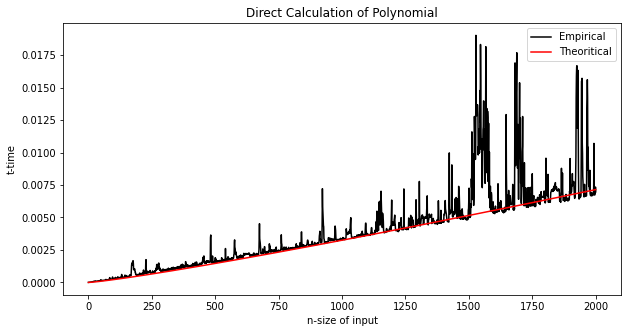

In [256]:
# 4 : evaluation of polynomial
N=2001
x1 = numpy.linspace(1, N-1, N-1, endpoint=True) 
y1 = avg_time[3]                        # the average empirical time execution
y2=0.00000047*(numpy.log(x1))*x1        #the theoritical time execution
plt.figure(figsize=(10,5))
plt.plot(x1, y1, 'k-')
plt.plot(x1, y2, 'r-')
plt.title(processes_names[3])
plt.legend(["Empirical", "Theoritical"])
plt.xlabel("n-size of input")
plt.ylabel("t-time")

Text(0, 0.5, 't-time')

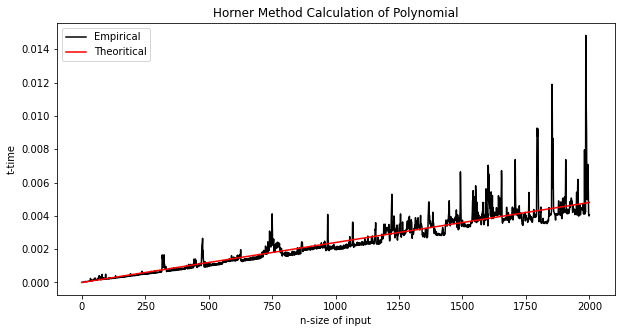

In [255]:
# 5 : evaluation of polynomial Horner
N=2001
x1 = numpy.linspace(1, N-1, N-1, endpoint=True) 
y1 = avg_time[4]                    # the average empirical time execution
plt.figure(figsize=(10,5))
plt.plot(x1, y1, 'k-')
plt.plot(x1, 0.0000024*x1, 'r-')    #the theoritical time execution
plt.title(processes_names[4])
plt.legend(["Empirical", "Theoritical"])
plt.xlabel("n-size of input")
plt.ylabel("t-time")

Text(0, 0.5, 't-time')

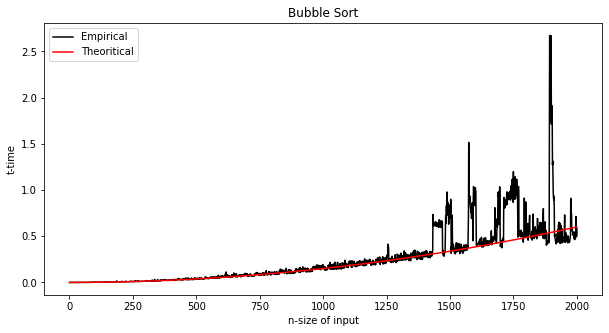

In [254]:
# 6 : Bubble sort
y1 = avg_time[5]            # the average empirical time execution
x1 = numpy.linspace(1, N-1, N-1, endpoint=True) 
plt.figure(figsize=(10,5))
plt.plot(x1, y1, 'k-')
plt.plot(x1, 0.00000015*pow(x1,2), 'r-') #the theoritical time execution
plt.title(processes_names[5])
plt.legend(["Empirical", "Theoritical"])
plt.xlabel("n-size of input")
plt.ylabel("t-time")

Text(0, 0.5, 't-time')

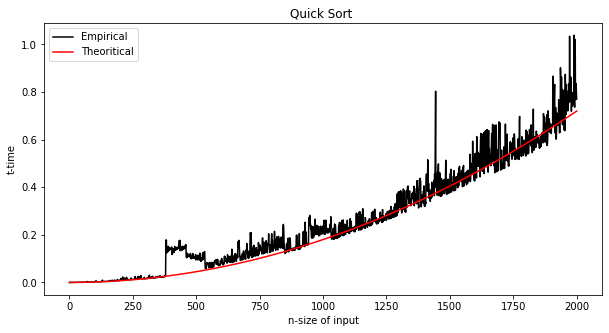

In [252]:
# 7 : quick sort
N=2001
x1 = numpy.linspace(1, N-1, N-1, endpoint=True) 
y1 = avg_time[6]        # the average empirical time execution
y2=0.00000018*pow(x1,2) #the theoritical time execution
plt.figure(figsize=(10,5))
plt.plot(x1, y1, 'k-')
plt.plot(x1, y2, 'r-')
plt.legend(["Empirical", "Theoritical"])
plt.title(processes_names[6])
plt.xlabel("n-size of input")
plt.ylabel("t-time")

Text(0, 0.5, 't-time')

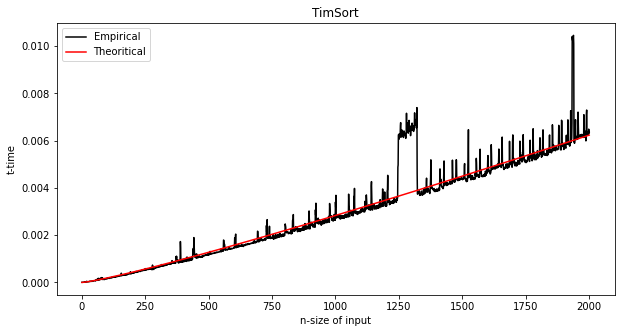

In [253]:
# 8 : Timsort
N=2001
x1 = numpy.linspace(1, N-1, N-1, endpoint=True) 
y1 = avg_time[7]                    # the average empirical time execution
y2=0.00000041*(numpy.log(x1))*x1    #the theoritical time execution
plt.figure(figsize=(10,5))
plt.plot(x1, y1, 'k-')
plt.plot(x1, y2, 'r-')
plt.title(processes_names[7])
plt.legend(["Empirical", "Theoritical"])
plt.xlabel("n-size of input")
plt.ylabel("t-time")

Text(0, 0.5, 't-time')

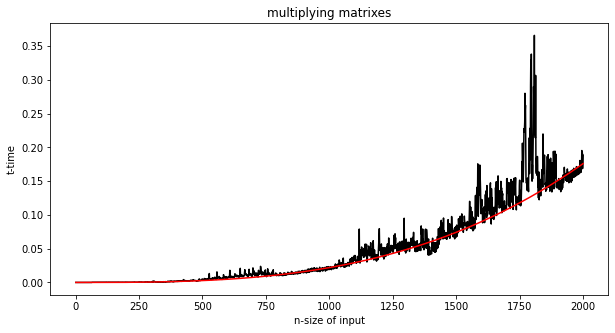

In [302]:
# 9 : Array Multiplication

N=2001
x1 = numpy.linspace(1, N-1, N-1, endpoint=True)
y1 = (avg_time[8])      # the average empirical time execution
plt.figure(figsize=(10,5))
plt.title(processes_names[8])
plt.plot(x1, y1, 'k-')
plt.plot(x1, 0.000000000022*pow(x1,3), 'r-') #the theoritical time execution
#plt.legend(["Empirical", "Theoritical"])
plt.xlabel("n-size of input")
plt.ylabel("t-time")